# 04a. Supervised machine learning - Sales vs Profit
## Notebook content:
    1. Importing libraries and data
    2. Data prep for regression analysis
    3. Regression analysis

## 1. Importing visualisation libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

In [3]:
path = r'C:\Users\bruna\Data Analysis Projects\2023-12 Superstore Sales Analysis'

In [4]:
# Import the sales data
sales_clean = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'sales_clean.pkl'))

## 2. Data prep for regression analysis

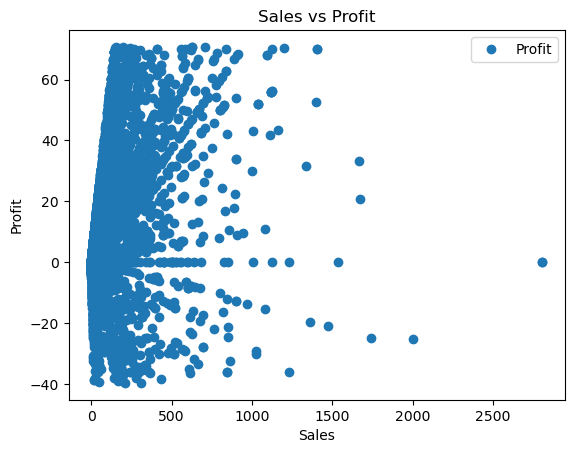

In [7]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

sales_clean.plot(x = 'Sales', y='Profit',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Sales vs Profit')  
plt.xlabel('Sales')  
plt.ylabel('Profit')  
plt.show()

In [8]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = sales_clean['Sales'].values.reshape(-1,1)
y = sales_clean['Profit'].values.reshape(-1,1)

In [9]:
X

array([[261.96 ],
       [ 14.62 ],
       [ 22.368],
       ...,
       [ 91.96 ],
       [258.576],
       [ 29.6  ]])

In [10]:
y

array([[41.9136],
       [ 6.8714],
       [ 2.5164],
       ...,
       [15.6332],
       [19.3932],
       [13.32  ]])

In [11]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 3. Regression analysis

In [12]:
# Create a regression object, which will be fit onto the training set

regression = LinearRegression()

In [13]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

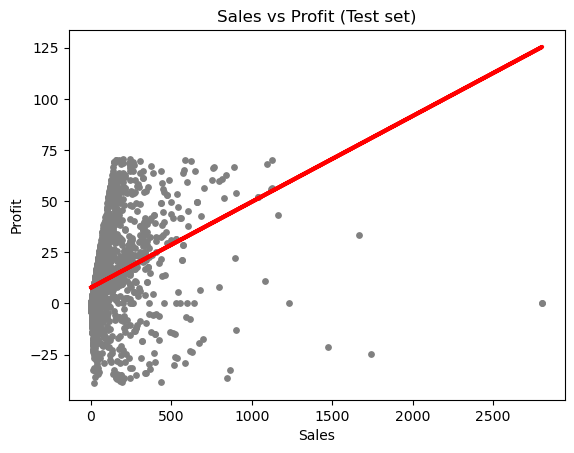

In [15]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Sales vs Profit (Test set)')
plot_test.xlabel('Sales')
plot_test.ylabel('Profit')
plot_test.show()

In [16]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [17]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.04193337]]
Mean squared error:  321.3348998153415
R2 score:  0.07816575798353464


In [18]:
y_predicted

array([[ 7.82484356],
       [ 8.43673526],
       [ 8.27017593],
       ...,
       [ 9.66202827],
       [13.92614856],
       [ 8.26313112]])

In [19]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,-0.9900,7.824844
1,0.6312,8.436735
2,3.9852,8.270176
3,3.9102,8.109655
4,22.2980,15.255269
5,-33.1390,8.671562
6,35.0400,10.713717
7,3.4048,8.590882
8,9.4700,8.569245
9,32.1300,14.115352


##### Compare how the regression fits the training set

In [20]:
# Predict 

y_predicted_train = regression.predict(X_train)

In [21]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [22]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.04193337]]
Mean squared error:  307.51007225784
R2 score:  0.11370750161899768


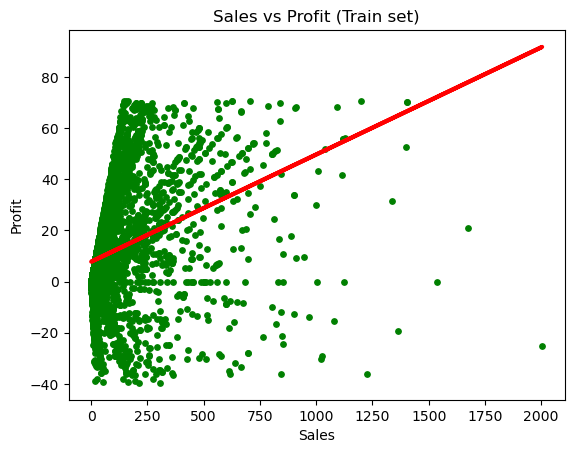

In [24]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Sales vs Profit (Train set)')
plot_test.xlabel('Sales')
plot_test.ylabel('Profit')
plot_test.show()

##### Conclusion:
- The linear model (red line) doens't perfectly fit the data points.
- The statistical summary also show that the model isn't performing very wel: The slope shows a slight positive relationship, and MSE is relatively small, indicating a line relatively close to the data point. However, R2 score is quite small, showing a poor fit of the model. 
- The same poor fit is observed when comparing the actual to the predicted values of y (which are very different to each other).
- Conclusion: while sales is an important factor in profit, it’s not the only one. This makes sense when considering discounts applicable to items.